In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from uszipcode import search
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('../../../data/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront       float64
view             float64
condition          int64
grade              int64
sqft_above         int64
sqft_basement     object
yr_built           int64
yr_renovated     float64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [4]:
df.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [5]:
df["sqft_basement"] = pd.to_numeric(df.sqft_basement, errors='coerce')

In [6]:
df["sqft_total"] = df["sqft_basement"] + df["sqft_above"]
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_total
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,1180.0
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,2570.0
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062,770.0
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,1960.0
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,1680.0


In [7]:
df[df.columns[1:]].corr()['price'][:]

price            1.000000
bedrooms         0.308787
bathrooms        0.525906
sqft_living      0.701917
sqft_lot         0.089876
floors           0.256804
waterfront       0.276295
view             0.395734
condition        0.036056
grade            0.667951
sqft_above       0.605368
sqft_basement    0.325008
yr_built         0.053953
yr_renovated     0.129599
zipcode         -0.053402
lat              0.306692
long             0.022036
sqft_living15    0.585241
sqft_lot15       0.082845
sqft_total       0.702328
Name: price, dtype: float64

In [8]:
df['zipcode'].value_counts().head(10)

98103    602
98038    589
98115    583
98052    574
98117    553
98042    547
98034    545
98118    507
98023    499
98006    498
Name: zipcode, dtype: int64

In [9]:
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_total
id,1.000000,-0.016772,0.001150,0.005162,-0.012241,-0.131911,0.018608,-0.004176,0.011592,-0.023803,...,-0.010799,-0.004548,0.021617,-0.012010,-0.008211,-0.001798,0.020672,-0.002701,-0.138557,-0.011721
price,-0.016772,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.276295,0.395734,0.036056,...,0.605368,0.325008,0.053953,0.129599,-0.053402,0.306692,0.022036,0.585241,0.082845,0.702328
bedrooms,0.001150,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,-0.002386,0.078523,0.026496,...,0.479386,0.302683,0.155670,0.018495,-0.154092,-0.009951,0.132054,0.393406,0.030690,0.577998
bathrooms,0.005162,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.067282,0.186451,-0.126479,...,0.686668,0.282693,0.507173,0.051050,-0.204786,0.024280,0.224903,0.569884,0.088303,0.755278
sqft_living,-0.012241,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.110230,0.282532,-0.059445,...,0.876448,0.434576,0.318152,0.055660,-0.199802,0.052155,0.241214,0.756402,0.184342,1.000000
sqft_lot,-0.131911,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.023143,0.075298,-0.008830,...,0.184139,0.015533,0.052946,0.004513,-0.129586,-0.085514,0.230227,0.144763,0.718204,0.172941
floors,0.018608,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.021883,0.028436,-0.264075,...,0.523989,-0.245144,0.489193,0.003535,-0.059541,0.049239,0.125943,0.280102,-0.010722,0.354688
waterfront,-0.004176,0.276295,-0.002386,0.067282,0.110230,0.023143,0.021883,1.000000,0.406654,0.017642,...,0.075463,0.090200,-0.026079,0.087244,0.031057,-0.012772,-0.039864,0.088860,0.032002,0.111726
view,0.011592,0.395734,0.078523,0.186451,0.282532,0.075298,0.028436,0.406654,1.000000,0.045735,...,0.166299,0.276521,-0.054564,0.100964,0.085277,0.006141,-0.077894,0.279561,0.073332,0.283797
condition,-0.023803,0.036056,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,0.017642,0.045735,1.000000,...,-0.158904,0.170972,-0.361592,-0.061858,0.002888,-0.015102,-0.105877,-0.093072,-0.003126,-0.061294


In [10]:
df[df.columns[1:]].corr()['price'][:]

price            1.000000
bedrooms         0.308787
bathrooms        0.525906
sqft_living      0.701917
sqft_lot         0.089876
floors           0.256804
waterfront       0.276295
view             0.395734
condition        0.036056
grade            0.667951
sqft_above       0.605368
sqft_basement    0.325008
yr_built         0.053953
yr_renovated     0.129599
zipcode         -0.053402
lat              0.306692
long             0.022036
sqft_living15    0.585241
sqft_lot15       0.082845
sqft_total       0.702328
Name: price, dtype: float64

In [11]:
X = df.drop('price', axis = 1)
y = df['price']

# Create a train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2021)

In [12]:
# Isolate the features for the first model
model_1_train = X_train[['bathrooms']]

model_1_test = X_test[['bathrooms']]

# Initialize a model
model1 = LinearRegression()

# Fit the model
model1.fit(model_1_train, y_train)


# Generate training and test predictions
train_preds = model1.predict(model_1_train)
test_preds = model1.predict(model_1_test)

# Calculate training and test error
train_error = mean_squared_error(y_train, train_preds)
test_error = mean_squared_error(y_test, test_preds)

# What is the difference in training and test error?
difference = test_error - train_error

# Print results
print('Train error:', train_error)
print('Test error:', test_error)
print('Difference:', difference)
print('Intercept:', model1.intercept_)

Train error: 96854584708.1029
Test error: 99972372383.47472
Difference: 3117787675.371811
Intercept: 10672.359182282118


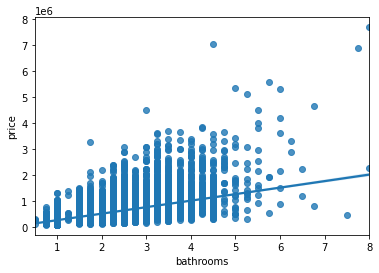

In [13]:
x = df['bathrooms']
sns.regplot(x, y);

In [14]:
df.bathrooms.describe()

count    21597.000000
mean         2.115826
std          0.768984
min          0.500000
25%          1.750000
50%          2.250000
75%          2.500000
max          8.000000
Name: bathrooms, dtype: float64

In [15]:
df_group = df.groupby(['zipcode']).mean().sort_values('price', ascending=False)
df_group.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,sqft_total
zipcode,,,,,,,,,,,,,,,,,,,,
98039,3.755708e+09,2.161300e+06,4.060000,3.200000,3800.900000,17403.560000,1.560000,0.022222,0.440000,3.480000,9.560000,3290.900000,520.408163,1972.520000,448.400000,47.625840,-122.233540,3132.200000,17291.100000,3767.244898
98004,4.394237e+09,1.356524e+06,3.854890,2.527603,2909.022082,13104.220820,1.432177,0.003534,0.306962,3.495268,8.687697,2419.842271,492.285714,1971.470032,213.759542,47.616183,-122.205189,2674.700315,12805.022082,2910.730159
98040,4.199323e+09,1.194874e+06,4.028369,2.716312,3106.833333,13704.464539,1.505319,0.044715,0.774194,3.787234,8.960993,2474.329787,634.389892,1971.471631,240.269710,47.559846,-122.225592,2898.744681,12801.283688,3114.068592
98112,4.826282e+09,1.096239e+06,3.509294,2.373606,2498.743494,4990.431227,1.806691,0.000000,0.149254,3.516729,8.442379,2005.695167,500.766284,1944.449814,185.809735,47.629619,-122.297866,2280.078067,4898.159851,2515.103448
98102,4.102040e+09,8.996077e+05,3.250000,2.283654,2151.048077,3605.153846,1.990385,0.000000,0.153846,3.375000,8.298077,1752.442308,399.750000,1952.163462,103.428571,47.634591,-122.322250,1954.471154,3303.500000,2153.990000


In [16]:
df['zipcode'].value_counts()

98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

In [ ]:
df['city'].value_counts()

In [24]:
def getcity(zipcode):
    if (zipcode == 98002) or (zipcode == 98092):
        return 'Auburn'
    elif(zipcode == 98224):
        return 'Baring'
    elif(zipcode == 98004) or (zipcode == 98005) or (zipcode == 98006) or (zipcode == 98007) or (zipcode == 98008):
        return 'Bellevue'
    elif(zipcode == 98010):
        return 'Black Diamond'
    elif(zipcode == 98011):
        return 'Bothell'
    elif(zipcode == 98178):
        return 'Bryn Mawr-Skyway'
    elif(zipcode == 98148) or (zipcode == 98166):
        return 'Burien'
    elif(zipcode == 98014):
        return 'Carnation'
    elif(zipcode == 98077):
        return 'Cottage Lake'
    elif(zipcode == 98042):
        return 'Covington'
    elif(zipcode == 98198):
        return 'Des Moines'
    elif(zipcode == 98019):
        return 'Duvall'
    elif(zipcode == 98031):
        return 'East Hill-Meridian'
    elif(zipcode == 98022):
        return 'Enumclaw'
    elif(zipcode == 98058):
        return 'Fairwood'
    elif(zipcode ==98024):
        return 'Fall city'
    elif(zipcode == 98003) or (zipcode == 98023):
        return 'Federal Way'
    elif(zipcode == 98027) or (zipcode == 98029):
        return 'Issaquah'
    elif(zipcode == 98028):
        return 'Kenmore'
    elif(zipcode == 98032) or (zipcode == 98030):
        return 'Kent'
    elif(zipcode == 98033) or (zipcode == 98034):
        return 'Kirkland'
    elif (zipcode == 98001):
        return 'Lakeland North'
    elif(zipcode == 98038):
        return 'Maple Valley'
    elif(zipcode == 98039):
        return 'Medina'
    elif(zipcode == 98040):
        return 'Mercer Island'
    elif(zipcode == 98045):
        return 'North Bend'
    elif(zipcode == 98047):
        return 'Pacific'
    elif(zipcode == 98050):
        return 'Preston'
    elif(zipcode == 98051):
        return 'Ravensdale'
    elif(zipcode == 98052):
        return 'Redmond'
    elif(zipcode == 98055) or (zipcode == 98056) or(zipcode == 98057) or (zipcode == 98059):
        return 'Renton'
    elif(zipcode == 98074) or (zipcode == 98075):
        return 'Sammamish'
    elif (zipcode == 98188):
        return 'SeaTac'
    elif (zipcode == 98199) or (zipcode == 98174) or (zipcode == 98154) or (zipcode == 98158) or (zipcode == 98164) or (zipcode == 98101) or (zipcode == 98102) or (zipcode == 98103) or (zipcode == 98105) or (zipcode == 98106) or (zipcode == 98107) or (zipcode == 98108) or (zipcode == 98109) or (zipcode == 98112) or (zipcode == 98115) or (zipcode == 98116) or (zipcode == 98117) or (zipcode == 98118) or (zipcode == 98119) or (zipcode == 98121) or (zipcode == 98122) or (zipcode == 98125) or (zipcode == 98126) or (zipcode == 98133) or (zipcode == 98134) or (zipcode == 98136) or (zipcode == 98144): 
        return 'Seattle'
    elif (zipcode == 98155) or (zipcode == 98177):
        return 'Shoreline'
    elif (zipcode == 98288):
        return 'Skykomish'
    elif (zipcode == 98065):
        return 'Snoqualmie'
    elif (zipcode == 98168):
        return 'Tukwila'
    elif (zipcode == 98053):
        return 'Union Hill-Novelty Hill'
    elif (zipcode == 98195):
        return 'Univ Of Washington'
    elif (zipcode == 98070):
        return 'Vashon'
    elif (zipcode == 98146):
        return 'White Center'
    elif (zipcode == 98072):
        return 'Woodinville'


    
        
    
    
    
    
city = df.zipcode.apply(getcity)
df['city'] = city
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_total,city
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,1180.0,Bryn Mawr-Skyway
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,2570.0,Seattle
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062,770.0,Kenmore
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,1960.0,Seattle
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,1680.0,Sammamish
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509,1530.0,Seattle
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200,2310.0,White Center
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007,1020.0,Seattle
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,...,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287,1600.0,Issaquah
